# Resturant Reviews


***DataDescription***
> The data consists of 2 columns Review and Liked
> 
> Review: The reviews on resturants were in the Review Column
> 
> Liked: The Good and Bad Review are denoted in the Liked column in the form of 0 and 1 
> 
> 0- Bad Review
> 
> 1- Good Review

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv


# Adding Basic Liberaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Loading the Data

In [3]:
df = pd.read_csv('/kaggle/input/restaurant-reviews/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Getting the shape of data
df.shape

(1000, 2)

* **Setting Parameters**

In [5]:
vocab_size = 500
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 900

***Seperating data column to sentences and Labels***

In [6]:
sentences = df['Review'].tolist()
labels  = df['Liked'].tolist()

# Getting Training and Testing Data

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Setting Tokenizer And Padding data

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

***Converting data into arrays***

In [9]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Creating CNN model
# Adding Layers
# Compiling Models

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
# Getting Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


# Fiting CNN Model

In [12]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
29/29 - 1s - loss: 0.6906 - accuracy: 0.5467 - val_loss: 0.7499 - val_accuracy: 0.0400
Epoch 2/50
29/29 - 0s - loss: 0.6876 - accuracy: 0.5511 - val_loss: 0.7771 - val_accuracy: 0.0400
Epoch 3/50
29/29 - 0s - loss: 0.6871 - accuracy: 0.5511 - val_loss: 0.7946 - val_accuracy: 0.0400
Epoch 4/50
29/29 - 0s - loss: 0.6861 - accuracy: 0.5511 - val_loss: 0.7814 - val_accuracy: 0.0400
Epoch 5/50
29/29 - 0s - loss: 0.6857 - accuracy: 0.5511 - val_loss: 0.7974 - val_accuracy: 0.0400
Epoch 6/50
29/29 - 0s - loss: 0.6840 - accuracy: 0.5511 - val_loss: 0.8091 - val_accuracy: 0.0400
Epoch 7/50
29/29 - 0s - loss: 0.6828 - accuracy: 0.5511 - val_loss: 0.7978 - val_accuracy: 0.0400
Epoch 8/50
29/29 - 0s - loss: 0.6808 - accuracy: 0.5511 - val_loss: 0.7940 - val_accuracy: 0.0400
Epoch 9/50
29/29 - 0s - loss: 0.6789 - accuracy: 0.5511 - val_loss: 0.7743 - val_accuracy: 0.0400
Epoch 10/50
29/29 - 0s - loss: 0.6745 - accuracy: 0.5511 - val_loss: 0.7815 - val_accuracy: 0.0500
Epoch 11/50
29/29 -

# Plotting accuracy and loss Graph

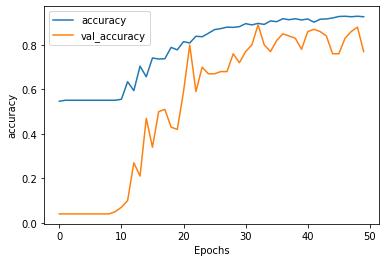

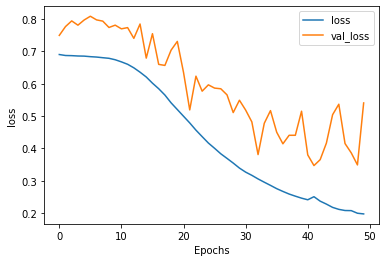

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

* The 1st Graph Show the Difference B/w Increase in accuracy and val_accuracy 
* The 2nd Graph show the difference b/w decrease in loss and val_loss

***Decoding Sentences*** 

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[0])
print(labels[0])

wow loved this place ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
Wow... Loved this place.
1


# Prediction on Testing Data

In [15]:
for n in range(10):
    print(testing_sentences[n],': ',testing_labels[n])

Spend your money elsewhere. :  0
Their regular toasted bread was equally satisfying with the occasional pats of butter... Mmmm...! :  1
The Buffet at Bellagio was far from what I anticipated. :  0
And the drinks are WEAK, people! :  0
-My order was not correct. :  0
Also, I feel like the chips are bought, not made in house. :  0
After the disappointing dinner we went elsewhere for dessert. :  0
The chips and sals a here is amazing!!!!!!!!!!!!!!!!!!! :  1
We won't be returning. :  0
This is my new fav Vegas buffet spot. :  1


> As we can see here the testing was all perfect!!!!!

> Bad Reviews are marked as 0

> Good reviews are marked as 1

# Getting Prediction with Randomly Created Reviews

In [16]:
# Checking Predictions
sentence = ["Awesome Pizza", "I will come here everytime!!!", "Dont come here ever, Worst Food"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.95942914]
 [0.8467437 ]
 [0.07651043]]


* As we can see the sentences i created randomly were Predicted almost perfectly
* the **First 2 reviews** were **good** to they got score which is **almost equals** to **1**
* The **3rd review** was the **bad** one so as we can see its score is **almost equal** to **0**

***Please Leave your Valuable feedback in the comments below!!!!!!***